In [1]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("Credit Card Transactions.csv")

In [3]:
data.shape

(5000, 23)

In [4]:
data.head()

,Customer_ID,Status_Checking_Acc,Duration_in_Months,Credit_History,Purposre_Credit_Taken,Credit_Amount,Savings_Acc,Years_At_Present_Employment,Inst_Rt_Income,Marital_Status_Gender,...,Age,Other_Inst_Plans,Housing,Num_CC,Job,Dependents,Telephone,Foreign_Worker,Default_On_Payment,Count
0,100001,A11,6,A34,A43,1169,A65,A75,4,A93,...,67,A143,A152,2,A173,1,A192,A201,0,1
1,100002,A12,48,A32,A43,5951,A61,A73,2,A92,...,22,A143,A152,1,A173,1,A191,A201,0,1
2,100003,A14,12,A34,A46,2096,A61,A74,2,A93,...,49,A143,A152,1,A172,2,A191,A201,0,1
3,100004,A11,42,A32,A42,7882,A61,A74,2,A93,...,45,A143,A153,1,A173,2,A191,A201,0,1
4,100005,A11,24,A33,A40,4870,A61,A73,3,A93,...,53,A143,A153,2,A173,2,A191,A201,1,1


In [5]:
data = data.drop(['Customer_ID', 'Count'], axis=1)
data.columns

Index(['Status_Checking_Acc', 'Duration_in_Months', 'Credit_History',
       'Purposre_Credit_Taken', 'Credit_Amount', 'Savings_Acc',
       'Years_At_Present_Employment', 'Inst_Rt_Income',
       'Marital_Status_Gender', 'Other_Debtors_Guarantors',
       'Current_Address_Yrs', 'Property', 'Age', 'Other_Inst_Plans', 'Housing',
       'Num_CC', 'Job', 'Dependents', 'Telephone', 'Foreign_Worker',
       'Default_On_Payment'],
      dtype='object')

In [6]:
data[data==0].count()

Status_Checking_Acc               0
Duration_in_Months                0
Credit_History                    0
Purposre_Credit_Taken             0
Credit_Amount                     0
Savings_Acc                       0
Years_At_Present_Employment       0
Inst_Rt_Income                    0
Marital_Status_Gender             0
Other_Debtors_Guarantors          0
Current_Address_Yrs               0
Property                          0
Age                               0
Other_Inst_Plans                  0
Housing                           0
Num_CC                            0
Job                               0
Dependents                        0
Telephone                         0
Foreign_Worker                    0
Default_On_Payment             3505
dtype: int64

In [7]:
data.isnull().sum()

Status_Checking_Acc            0
Duration_in_Months             0
Credit_History                 0
Purposre_Credit_Taken          0
Credit_Amount                  0
Savings_Acc                    0
Years_At_Present_Employment    0
Inst_Rt_Income                 0
Marital_Status_Gender          0
Other_Debtors_Guarantors       0
Current_Address_Yrs            0
Property                       0
Age                            0
Other_Inst_Plans               0
Housing                        0
Num_CC                         0
Job                            0
Dependents                     0
Telephone                      0
Foreign_Worker                 0
Default_On_Payment             0
dtype: int64

In [8]:
data['Default_On_Payment'].value_counts()

0    3505
1    1495
Name: Default_On_Payment, dtype: int64

In [9]:
data['Default_On_Payment'].value_counts()

0    3505
1    1495
Name: Default_On_Payment, dtype: int64

In [10]:
li = list(data[data.Default_On_Payment == 0].sample(n=2000).index)

In [11]:
data = data.drop(data.index[li])

data['Default_On_Payment'].value_counts()

0    1505
1    1495
Name: Default_On_Payment, dtype: int64

In [12]:
import matplotlib.pyplot as plt
plt.scatter(data.index, data['Credit_Amount'])

In [13]:
li = list(data['Credit_Amount'].sort_values()[-5:].index)

In [14]:
data['Credit_Amount'][li] = int(data.drop(li)['Credit_Amount'].mean())

C:\Users\Sarthak Wadhawan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


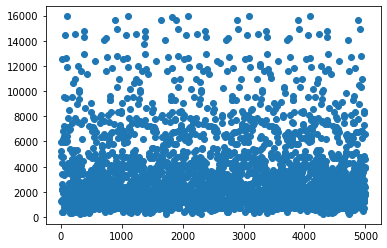

In [15]:
plt.scatter(data.index, data['Credit_Amount'])

In [16]:
data.head()

,Status_Checking_Acc,Duration_in_Months,Credit_History,Purposre_Credit_Taken,Credit_Amount,Savings_Acc,Years_At_Present_Employment,Inst_Rt_Income,Marital_Status_Gender,Other_Debtors_Guarantors,...,Property,Age,Other_Inst_Plans,Housing,Num_CC,Job,Dependents,Telephone,Foreign_Worker,Default_On_Payment
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,1
6,A14,24,A32,A42,2835,A63,A75,3,A93,A101,...,A122,53,A143,A152,1,A173,1,A191,A201,0
8,A14,12,A32,A43,3059,A64,A74,2,A91,A101,...,A121,61,A143,A152,1,A172,1,A191,A201,0
9,A12,30,A34,A40,5234,A61,A71,4,A94,A101,...,A123,28,A143,A152,2,A174,1,A191,A201,1
10,A12,12,A32,A40,1295,A61,A72,3,A92,A101,...,A123,25,A143,A151,1,A173,1,A191,A201,1


In [17]:
data.reset_index(drop=True,inplace=True)

In [18]:
data.head()

,Status_Checking_Acc,Duration_in_Months,Credit_History,Purposre_Credit_Taken,Credit_Amount,Savings_Acc,Years_At_Present_Employment,Inst_Rt_Income,Marital_Status_Gender,Other_Debtors_Guarantors,...,Property,Age,Other_Inst_Plans,Housing,Num_CC,Job,Dependents,Telephone,Foreign_Worker,Default_On_Payment
0,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,1
1,A14,24,A32,A42,2835,A63,A75,3,A93,A101,...,A122,53,A143,A152,1,A173,1,A191,A201,0
2,A14,12,A32,A43,3059,A64,A74,2,A91,A101,...,A121,61,A143,A152,1,A172,1,A191,A201,0
3,A12,30,A34,A40,5234,A61,A71,4,A94,A101,...,A123,28,A143,A152,2,A174,1,A191,A201,1
4,A12,12,A32,A40,1295,A61,A72,3,A92,A101,...,A123,25,A143,A151,1,A173,1,A191,A201,1


In [19]:
encoder = preprocessing.LabelEncoder()

for i in data.columns:
    if isinstance(data[i][0], str):
            data[i] = encoder.fit_transform(data[i])

In [20]:
data.head()

,Status_Checking_Acc,Duration_in_Months,Credit_History,Purposre_Credit_Taken,Credit_Amount,Savings_Acc,Years_At_Present_Employment,Inst_Rt_Income,Marital_Status_Gender,Other_Debtors_Guarantors,...,Property,Age,Other_Inst_Plans,Housing,Num_CC,Job,Dependents,Telephone,Foreign_Worker,Default_On_Payment
0,0,24,3,0,4870,0,2,3,2,0,...,3,53,2,2,2,2,2,0,0,1
1,3,24,2,3,2835,2,4,3,2,0,...,1,53,2,1,1,2,1,0,0,0
2,3,12,2,4,3059,3,3,2,0,0,...,0,61,2,1,1,1,1,0,0,0
3,1,30,4,0,5234,0,0,4,3,0,...,2,28,2,1,2,3,1,0,0,1
4,1,12,2,0,1295,0,1,3,1,0,...,2,25,2,0,1,2,1,0,0,1


In [21]:
data.keys()

Index(['Status_Checking_Acc', 'Duration_in_Months', 'Credit_History',
       'Purposre_Credit_Taken', 'Credit_Amount', 'Savings_Acc',
       'Years_At_Present_Employment', 'Inst_Rt_Income',
       'Marital_Status_Gender', 'Other_Debtors_Guarantors',
       'Current_Address_Yrs', 'Property', 'Age', 'Other_Inst_Plans', 'Housing',
       'Num_CC', 'Job', 'Dependents', 'Telephone', 'Foreign_Worker',
       'Default_On_Payment'],
      dtype='object')

In [22]:
X = data.drop(['Default_On_Payment'], axis=1)
y = data['Default_On_Payment']

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = add_constant(X)

pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns).sort_values()

C:\Users\Sarthak Wadhawan\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Other_Inst_Plans                1.042858
Foreign_Worker                  1.060187
Marital_Status_Gender           1.068350
Other_Debtors_Guarantors        1.070306
Purposre_Credit_Taken           1.082411
Dependents                      1.102674
Savings_Acc                     1.115571
Status_Checking_Acc             1.175729
Years_At_Present_Employment     1.197868
Current_Address_Yrs             1.204992
Num_CC                          1.227161
Inst_Rt_Income                  1.268127
Credit_History                  1.275144
Telephone                       1.304984
Age                             1.308104
Job                             1.321169
Housing                         1.346998
Property                        1.410598
Duration_in_Months              1.802184
Credit_Amount                   2.147131
const                          58.235714
dtype: float64

In [24]:
#significancy using chisq
import scipy.stats as stats
from scipy.stats import chi2_contingency

Significance = pd.Series()

for i in X.columns:
    dfObserved = pd.crosstab(X[i],y)
    chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)
    Significance[i] = p

Significance.sort_values()

Credit_Amount                  1.534685e-203
Status_Checking_Acc            8.390958e-101
Credit_History                  4.706739e-44
Duration_in_Months              1.102792e-40
Savings_Acc                     5.566298e-29
Purposre_Credit_Taken           1.084088e-28
Age                             3.250880e-18
Property                        2.102050e-17
Years_At_Present_Employment     1.109649e-13
Housing                         3.184964e-13
Other_Inst_Plans                4.331018e-11
Marital_Status_Gender           3.024669e-06
Foreign_Worker                  3.409750e-06
Inst_Rt_Income                  3.137943e-05
Other_Debtors_Guarantors        2.648580e-04
Num_CC                          1.423885e-02
Job                             4.002956e-02
Telephone                       1.338066e-01
Current_Address_Yrs             5.138897e-01
Dependents                      5.221898e-01
const                           1.000000e+00
dtype: float64

In [25]:
import scipy.stats as stats
from scipy.stats import chi2_contingency

Significance = pd.Series()

for i in X.columns:
    dfObserved = pd.crosstab(X[i],y)
    chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)
    Significance[i] = (1-p)*100

Significance.sort_values()

const                            0.000000
Dependents                      47.781021
Current_Address_Yrs             48.611034
Telephone                       86.619340
Job                             95.997044
Num_CC                          98.576115
Other_Debtors_Guarantors        99.973514
Inst_Rt_Income                  99.996862
Foreign_Worker                  99.999659
Marital_Status_Gender           99.999698
Other_Inst_Plans               100.000000
Housing                        100.000000
Years_At_Present_Employment    100.000000
Credit_Amount                  100.000000
Purposre_Credit_Taken          100.000000
Property                       100.000000
Age                            100.000000
Credit_History                 100.000000
Duration_in_Months             100.000000
Status_Checking_Acc            100.000000
Savings_Acc                    100.000000
dtype: float64

In [26]:
import scipy.stats as stats
stats.f_oneway(X['Credit_Amount'],y)

F_onewayResult(statistic=3966.77777542743, pvalue=0.0)

In [27]:
stats.f_oneway(X['Age'],y)

F_onewayResult(statistic=27310.807474932863, pvalue=0.0)

In [ ]:
X=data.drop(['Dependents','Current_Address_Yrs'],axis=1)

In [44]:
#encode
from sklearn import preprocessing

encoder = preprocessing.LabelEncoder()

for i in data.columns:
    if isinstance(data[i][0], str):
            data[i] = encoder.fit_transform(data[i])

In [58]:
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [59]:
X=data.drop(['Default_On_Payment'],axis=1)
Y=data['Default_On_Payment']

In [60]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5,random_state = 4589)
print (X_train.shape, Y_train.shape)
print (X_test.shape, Y_test.shape)

(1500, 20) (1500,)
(1500, 20) (1500,)


In [66]:
lm = LogisticRegression()
model = lm.fit(X_train, Y_train)
predictions = lm.predict(X_test)

C:\Users\Sarthak Wadhawan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [67]:
print(model.score(X_test, Y_test))

0.7246666666666667


In [63]:
log = LogisticRegression()
log.fit(X_train,Y_train)

C:\Users\Sarthak Wadhawan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [64]:
pred = log.predict(X_test)
pred

array([0, 1, 0, ..., 1, 0, 1], dtype=int64)

In [65]:
log.score(X_test, Y_test)*100

72.46666666666667

In [53]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(Y_test,pred)*100

72.46666666666667

In [54]:
confusion_matrix(Y_test,pred)

array([[548, 195],
       [218, 539]], dtype=int64)

In [55]:
log.score(X_test, Y_test)*100

72.46666666666667